In [3]:
#load libraries
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn.feature_selection as skfs

In [4]:
#To normalize data
from sklearn.preprocessing import MinMaxScaler
#To encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
# Feature Importance
from sklearn import datasets
from sklearn import metrics
#Split data set
from sklearn.model_selection import train_test_split
#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [5]:
# define column names
names = ['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# loading training data (df = data frame)
df = pd.read_csv(r"C:\Users\Madhushi\Desktop\ML1_Assignment\Adult_Census_Income_Binary_Classification_dataset.csv", header=0, names=names, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#display first 3 rows of the data frame
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
#Pre processing 1 - Removing missing values start

#number of missing values in each column
(df[['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']] == "?").sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
# mark ? values as missing or NaN
df[['workclass', 'occupation','native-country']] = df[['workclass', 'occupation','native-country']].replace('?', np.NaN)

# count the number of NaN values in each column
df.isnull().sum()

# drop rows with missing values
df.dropna(inplace=True)

#removing missing values end

In [8]:
#Pre processing 2 - Binning Start(Continuous variables)

#Bin Age
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
#df.assign(age_binned=df.groupby(pd.cut(df['age'], bins=bins, labels=labels))['age'].transform('age_binned'))

#Bin education number
bins = [0,5,10,15,20]
labels = [0,1,2,3]
df['education-num_binned'] = pd.cut(df['education-num'], bins=bins, labels=labels)

#Bin capital gain
#Those who have a capital gain will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-gain_binned'] = pd.cut(df['capital-gain'], bins=bins, labels=labels)

#Bin capital loss
#Those who have a capital loss will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-loss_binned'] = pd.cut(df['capital-loss'], bins=bins, labels=labels)

#Bin hours per week
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['hours-per-week_binned'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels)

#Binning end
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3,2,1,0,3
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,2,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3,1,0,0,3
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5,1,0,0,3
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2,2,0,0,3


In [9]:
#Pre processinng 3 - Encoding Categorical Data

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in names:
       #Encoding only categorical variables
       if df[col].dtypes == 'object':
        #Using whole data to form an exhaustive list of levels
           le.fit(df[col].values)
           df[col]=le.transform(df[col])
            
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0,3,2,1,0,3
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0,4,2,0,0,1
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0,3,1,0,0,3


In [10]:
#Dividing into training and testing datasets start

# create design matrix X and target vector y
#X = np.array(df.loc['workclass', 'education', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'native-country', 'education-num_binned', 'age_binned', 'hours-per-week_binned'])
#y = np.array(df['income'])

y = df.income
X = df.drop(['income', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=42

#Dividing into training and testing datasets end

In [11]:
#Preprocessing 4 - Feature Extraction


In [12]:
#Order of importance
#occupation, relationship, age_binned, marital-status, hours-per-week_binned, education-num_binned, education, capital-gain_binned, workclass, sex, native-country, capital-loss_binned, race

In [13]:
X.head(1)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,5,9,4,0,1,4,1,38,3,2,1,0,3


In [14]:
################################################################################################
#KNN algorithm Using Python `sklearn' package start

#Instatiating Training and evaluating the model start

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.8206431649906067


In [15]:
#Finding the optimal k start

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 15


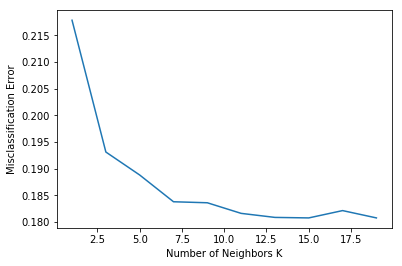

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#Finding the optimal k end

In [17]:
#Re-evaluating with the optimal k start

# instantiate learning model (k = 15)
knn = KNeighborsClassifier(n_neighbors=15)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

#Re-evaluating with the optimal k end

#KNN algorithm Using Python `sklearn' package end
################################################################################################

0.829373411426677


In [26]:
################################################################################################
#Logistic regression algorithm Using Keras start

#Instatiating Training and evaluating the model start

# instantiate learning model
rgmodel = Sequential()
rgmodel.add(Dense(1, activation='sigmoid', input_dim=13))
rgmodel.compile(optimizer='rmsprop', loss='binary_crossentropy')

# fitting the model
rgmodel.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# evaluate accuracy
print(rgmodel.evaluate(X_test, y_test, batch_size=50))

Train on 21113 samples, validate on 9049 samples
Epoch 1/300
21113/21113 [==============================] - 410s 19ms/step - loss: 1.2459 - val_loss: 0.6868
Epoch 2/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.5786 - val_loss: 0.4981
Epoch 3/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4869 - val_loss: 0.4580
Epoch 4/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.4624 - val_loss: 0.4434
Epoch 5/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4520 - val_loss: 0.4374
Epoch 6/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4467 - val_loss: 0.4364
Epoch 7/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4434 - val_loss: 0.4299
Epoch 8/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.4419 - val_loss: 0.4328
Epoch 9/300
21113/21113 [==============================] - 1s 36us/step - loss: 0.4409 - val_loss: 0.

21113/21113 [==============================] - 1s 33us/step - loss: 0.4201 - val_loss: 0.4091
Epoch 78/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.4197 - val_loss: 0.4079
Epoch 79/300
21113/21113 [==============================] - 1s 33us/step - loss: 0.4196 - val_loss: 0.4150
Epoch 80/300
21113/21113 [==============================] - 1s 33us/step - loss: 0.4196 - val_loss: 0.4070
Epoch 81/300
21113/21113 [==============================] - 1s 33us/step - loss: 0.4196 - val_loss: 0.4075
Epoch 82/300
21113/21113 [==============================] - 1s 33us/step - loss: 0.4190 - val_loss: 0.4169
Epoch 83/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.4193 - val_loss: 0.4070
Epoch 84/300
21113/21113 [==============================] - 1s 33us/step - loss: 0.4191 - val_loss: 0.4075
Epoch 85/300
21113/21113 [==============================] - 1s 37us/step - loss: 0.4192 - val_loss: 0.4062
Epoch 86/300
21113/21113 [========================

21113/21113 [==============================] - 1s 28us/step - loss: 0.4160 - val_loss: 0.4055
Epoch 154/300
21113/21113 [==============================] - 1s 27us/step - loss: 0.4157 - val_loss: 0.4162
Epoch 155/300
21113/21113 [==============================] - 1s 30us/step - loss: 0.4159 - val_loss: 0.4031
Epoch 156/300
21113/21113 [==============================] - 1s 27us/step - loss: 0.4157 - val_loss: 0.4033
Epoch 157/300
21113/21113 [==============================] - 1s 32us/step - loss: 0.4159 - val_loss: 0.4048
Epoch 158/300
21113/21113 [==============================] - 1s 29us/step - loss: 0.4156 - val_loss: 0.4033
Epoch 159/300
21113/21113 [==============================] - 1s 34us/step - loss: 0.4158 - val_loss: 0.4118
Epoch 160/300
21113/21113 [==============================] - 1s 41us/step - loss: 0.4155 - val_loss: 0.4036
Epoch 161/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4156 - val_loss: 0.4085
Epoch 162/300
21113/21113 [===============

Epoch 229/300
21113/21113 [==============================] - 1s 28us/step - loss: 0.4150 - val_loss: 0.4041
Epoch 230/300
21113/21113 [==============================] - 1s 28us/step - loss: 0.4151 - val_loss: 0.4029
Epoch 231/300
21113/21113 [==============================] - 1s 29us/step - loss: 0.4149 - val_loss: 0.4032
Epoch 232/300
21113/21113 [==============================] - 1s 29us/step - loss: 0.4148 - val_loss: 0.4043
Epoch 233/300
21113/21113 [==============================] - 1s 31us/step - loss: 0.4149 - val_loss: 0.4109
Epoch 234/300
21113/21113 [==============================] - 1s 51us/step - loss: 0.4150 - val_loss: 0.4030
Epoch 235/300
21113/21113 [==============================] - 1s 35us/step - loss: 0.4149 - val_loss: 0.4024
Epoch 236/300
21113/21113 [==============================] - 1s 28us/step - loss: 0.4148 - val_loss: 0.4081
Epoch 237/300
21113/21113 [==============================] - 1s 27us/step - loss: 0.4150 - val_loss: 0.4034
Epoch 238/300
21113/21113 [=

In [24]:
################################################################################################
#Neural Network algorithm Using Keras start

# instantiate learning model
classifier = Sequential()

# Adding the input layer aand the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 13, units = 20, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the third hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the fourth hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model
classifier.fit(X_train, y_train, batch_size = 100, epochs = 50)

# predict the response
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# evaluate accuracy with confusionmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

#Nural Network algorithm Using keras end
################################################################################################

Epoch 1/50
21113/21113 [==============================] - 319s 15ms/step - loss: 0.5664 - acc: 0.7471
Epoch 2/50
21113/21113 [==============================] - 0s 14us/step - loss: 0.4581 - acc: 0.7471
Epoch 3/50
21113/21113 [==============================] - 0s 21us/step - loss: 0.4207 - acc: 0.7954
Epoch 4/50
21113/21113 [==============================] - 0s 16us/step - loss: 0.3953 - acc: 0.8115
Epoch 5/50
21113/21113 [==============================] - 0s 18us/step - loss: 0.3833 - acc: 0.8156
Epoch 6/50
21113/21113 [==============================] - 0s 15us/step - loss: 0.3752 - acc: 0.8205
Epoch 7/50
21113/21113 [==============================] - 0s 14us/step - loss: 0.3740 - acc: 0.8193
Epoch 8/50
21113/21113 [==============================] - 0s 18us/step - loss: 0.3698 - acc: 0.8217
Epoch 9/50
21113/21113 [==============================] - 0s 19us/step - loss: 0.3674 - acc: 0.8244
Epoch 10/50
21113/21113 [==============================] - 0s 14us/step - loss: 0.3688 - acc: 0.82